In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import itertools
sys.path.append("/mnt/ssd/NMRlipids_VI-NewIonModel/scripts/")
import calcOrderParameters as cop
import fnmatch
import re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
    supplied root directory.'''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield os.path.join(path, filename)
            

In [4]:
class Simulation():
    '''Simulation class stores simulation data relevant for NMRlipids project 6'''
    def __init__(self, dirname, 
                 ordpars_fname="OrdPars.dat", 
                 dens_fname="density_ca_cl_water.xvg", 
                 conc_bulk_fname="conc_ion_bulk_mmolL.dat", 
                 conc_nominal_fname="conc_ion_nominal_mmolL.dat"):
        self.dirname = dirname
        self.ordpars = cop.parse_op_input(os.path.join(dirname, ordpars_fname))
        try:
            self.dens    = np.loadtxt(os.path.join(dirname, dens_fname))
            self.conc_bulk = np.loadtxt(os.path.join(dirname, conc_bulk_fname))
        except:
            print "Simulation in \n {d} \n has no densities or files with concentrations, setting concentrations to 0.".format(d=self.dirname)
            self.conc_bulk = np.zeros([2])
            self.conc_nominal = 0.0
        try:
            self.conc_nominal = np.loadtxt(os.path.join(dirname, conc_nominal_fname))
        except:
            print "Simulation in \n {d} \n has no file with nominal concentration, setting it to 0.".format(d=self.dirname)
            self.conc_nominal = 0.0


finding all ECC-lipids simulations with and without CaCl salt with various water models
---

In [5]:
sim_dirs = []
for f in locate("OrdPars.dat", root=os.curdir+"/NpT"):
    if "sim22a_0mM_NaCl" in f:
        sim_dirs.append(os.path.dirname(f))
    if "sim22a_" in f and "mM_CaCl-2s" in f:
        sim_dirs.append(os.path.dirname(f))

for f in sim_dirs:
    if "300K" in f or "ECC-water" in f:
        sim_dirs.remove(f)
        
sim_dirs.sort()

sims_waters = {}
for d in sim_dirs:
    sim = Simulation(d)
    #obtain the water model name from the nomenclature in the directory naming
    watname_end = d.rfind("_non-tail-atoms")
    watname_beg = d.rfind("_", 0, watname_end)
    wat_model = d[watname_beg+1:watname_end]
    if not wat_model in sims_waters.keys():
        sims_waters[wat_model] = []
    sims_waters[wat_model].append(sim)

Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22a_0mM_NaCl_OPC3_non-tail-atoms_q-sc_0.80_sig-sc_0.89_noIons-ref 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22a_0mM_NaCl_OPC4_non-tail-atoms_q-sc_0.80_sig-sc_0.89_noIons-ref 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22a_0mM_NaCl_OPC4_non-tail-atoms_q-sc_0.80_sig-sc_0.89_noIons-ref 
 has no file with nominal concentration, setting it to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22a_0mM_NaCl_SPCE_non-tail-atoms_q-sc_0.80_sig-sc_0.89_noIons-ref 
 has no densities or files with concentrations, setting concentrations to 0.
Simulation in 
 /mnt/ssd/NMRlipids_VI-NewIonModel/simulations/POPC/lipid14/NpT/sim22a_0mM_NaCl_TIP4p2005_non-tail-a

getting PN_vector data from Lipid14 simulations

In [6]:
opsdata_waters = {}
# regular expressions explained at https://docs.python.org/2/howto/regex.html#match-versus-search
#p = re.compile('\d+molF')  # string pattern for molar fraction in %
for watmod in sims_waters.keys():
    if not watmod in opsdata_waters.keys():
        opsdata_waters[watmod] = {}
    for s in sims_waters[watmod]:
        for opname in ["alpha1", "alpha2", "beta1", "beta2", "PN_vector", "g3_1", "g3_2"]:
            temp_list = []
            try:
                temp_list.append([s.conc_bulk[0], float(s.ordpars[opname].avg)])
                print s.conc_bulk[0], float(s.ordpars[opname].avg), float(s.ordpars[opname].errest)
            except:
                print "Simulation in dir \n {d} \n seem to have no record of the order parameter {op} -- skipping".format(d=s.dirname, op=opname)
            if opname in opsdata_waters[watmod].keys():
                opsdata_waters[watmod][opname].extend(temp_list)
            else:
                opsdata_waters[watmod][opname] = temp_list


print opsdata_waters

0.0 0.01437 0.00111
0.0 0.01381 0.00111
0.0 -0.04397 0.00106
0.0 -0.043 0.00107
0.0 71.78102 0.07989
0.0 -0.16853 0.00088
0.0 -0.18646 0.00082
272.467242525 -0.01701 0.00063
272.467242525 -0.018 0.00063
272.467242525 -0.05614 0.00061
272.467242525 -0.05762 0.00061
272.467242525 67.70256 0.04929
272.467242525 -0.14339 0.00053
272.467242525 -0.17068 0.00048
816.232890365 -0.02991 0.00076
816.232890365 -0.03243 0.00076
816.232890365 -0.06247 0.00074
816.232890365 -0.06477 0.00073
816.232890365 65.69461 0.06244
816.232890365 -0.14439 0.00065
816.232890365 -0.14689 0.00062
0.0 0.00859 0.00111
0.0 0.00926 0.00111
0.0 -0.0459 0.00106
0.0 -0.04657 0.00106
0.0 71.0464 0.08009
0.0 -0.16015 0.00089
0.0 -0.17845 0.00083
92.7881827243 0.00083 0.00078
92.7881827243 -0.00082 0.00078
92.7881827243 -0.04993 0.00075
92.7881827243 -0.05245 0.00075
92.7881827243 69.76658 0.05807
92.7881827243 -0.15837 0.00063
92.7881827243 -0.1742 0.00059
105.869870432 -0.00392 0.00078
105.869870432 -0.00066 0.00078
105.8

getting experimental results from Scherer89

In [7]:
exp_filenames = []
experiments = {}
freq_to_scd = 0.00748
# find files with the experimental values as read from figure4 in scherer89
for f in locate("EXP-Akutsu1981*CaClchange-T323.dat", root=os.curdir+"/../../../../lipid_ionINTERACTION/Data"):
    exp_filenames.append(f)
    
exp_data = np.loadtxt(exp_filenames[0], dtype=str)
# convert col1 to contain S_CD with a correct sign -- this is specific to these data
# convert col0 to contain concentrations in %-unit
experiments['beta']  = exp_data[:,0:-1]
experiments['alpha'] = exp_data[:,[0,2]]
for key in experiments.keys():
    templist = []
    for item in experiments[key]:
        if not item[1]=='-':
            fitem = np.array(item, dtype=float)
            freq_sign = 1.0
            if 'beta' in key:
                freq_sign = -1.0
            templist.append([fitem[0]*1.0, fitem[1]*freq_to_scd*freq_sign])
    experiments[key] = np.array(templist, dtype=float)
    
print experiments
        

{'alpha': array([[  0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+01,  -8.22800000e-03],
       [  1.00000000e+02,  -1.95976000e-02],
       [  3.50000000e+02,  -3.23884000e-02],
       [  1.00000000e+03,  -4.69744000e-02]]), 'beta': array([[  0.00000000e+00,  -0.00000000e+00],
       [  3.50000000e+02,  -1.69048000e-02],
       [  1.00000000e+03,  -2.00464000e-02]])}


In [8]:
# Make a colour code for the many water models
colour_palette = ['red', 'cyan', 'blue', 'indigo', 'green', 'pink', 'tan', 'teal', 'orange']

colour_code = {}
for key in opsdata_waters.keys():
    if not key in colour_code.keys():
        colour_code[key] = colour_palette.pop(0)

# Add experiments to the dictionary with all OPs-data
opsdata_waters['experiment'] = experiments
colour_code['experiment'] = 'black'

# Plotting figure 1: PN_vector and order parameters $\alpha$ and $\beta$ depend on the amount of bound charge - cationic surfactant

this is not list, not sorting. It's likely the experimental data. 
 water model: experiment ; opsplot: [[  0.00000000e+00   0.00000000e+00]
 [  1.00000000e+01  -8.22800000e-03]
 [  1.00000000e+02  -1.95976000e-02]
 [  3.50000000e+02  -3.23884000e-02]
 [  1.00000000e+03  -4.69744000e-02]]
this is not list, not sorting. It's likely the experimental data. 
 water model: experiment ; opsplot: [[  0.00000000e+00  -0.00000000e+00]
 [  3.50000000e+02  -1.69048000e-02]
 [  1.00000000e+03  -2.00464000e-02]]


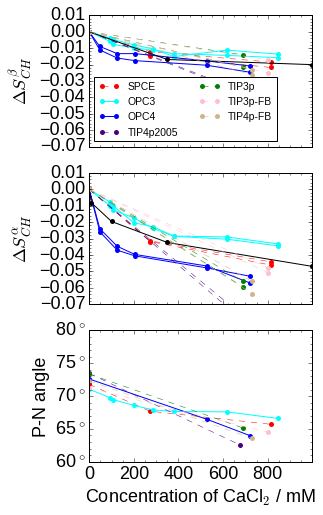

In [9]:
font = {'family' : 'Liberation Sans',
        'style'  : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig, axs = plt.subplots(nrows=3, ncols=1, sharex="all", figsize=[4,8], dpi=200)
#fig.subplotpars.left = 0.3

# give subplots human-redable names
dsa = axs[1] # Delta S alpha
dsb = axs[0] # Delta S beta
pna = axs[2] # PN_vector

# add some text for labels, title and axes ticks
pna.set_xlabel(r'Concentration of CaCl$_2$ / mM')
pna.set_ylabel(r'P-N angle')
dsa.set_ylabel(r'$\Delta S_{CH} ^{\alpha}$')
dsb.set_ylabel(r'$\Delta S_{CH} ^{\beta}$')

#pna.set_xlim([0.0,60.0])
#ax.set_xticks(r1)
#xlabelsl = list(xlabels)
#xlabelsl.extend(range(2, 18))
#ax.set_xticklabels(xlabelsl, rotation=0)

for watmod in opsdata_waters.keys():
    opsplot = opsdata_waters[watmod]
    for key in opsplot.keys():
        yerror = 0.001
        do_delta = False
        if key.startswith("alpha"):
            iplt = 1
            do_delta = True
            ylim = [-0.07, 0.01]
        elif key.startswith("beta"):
            iplt = 0
            do_delta = True
            ylim = [-0.07, 0.01]
        elif key.startswith("PN"):
            iplt = 2
            yerror = 0.15
            ylim = [60.0, 80.0]
        else:
            #print "this should not happen, setting iplt = 2 \n Key name was {}".format(key)
            iplt = 2
        ax = axs[iplt]
        ax.set_ylim(ylim)
        if isinstance(opsplot[key], list):
            opsplot[key].sort()
        else:
            print "this is not list, not sorting. It's likely the experimental data. \n water model: {} ; opsplot: {}".format(watmod, opsplot[key])
            pass
        data = np.array(opsplot[key])
        if do_delta:
            data[:,1] -= data[0,1]
        #ax.errorbar(data[:,0], data[:,1], yerr=yerror, lw=2.0, marker='s', markersize=5, mew=0, color=c) #, c=colour, lw=1.0, label=point_label)
        if key.startswith("beta1"):
            plot_label = watmod
        else:
            plot_label = None
        if key.startswith('alpha'):
            #print watmod, "\n", data, "\n"
            pass
        
        linewidth = 0.5
        linestyle = '--'
        if watmod.startswith('OPC') or watmod.startswith('exp'):
            linewidth = 1.0
            linestyle = '-'
            
        if not data.shape == (0,):
            ax.plot(data[:,0], data[:,1], c=colour_code[watmod],ls=linestyle, lw=linewidth, marker='o', markersize=5, mew=0, label=plot_label) #, c=colour, lw=1.0, label=point_label)

        
        
for ax in axs:
    ax.minorticks_on()
    pass
    
xlim = pna.get_xlim()
num_range = range(int(xlim[0]), int(xlim[1]), 200)
pna.set_xticks(num_range)
pna.set_xticklabels([ str(i) for i in num_range])
pna.set_xlim(xlim)

ylim = pna.get_ylim()
pna.set_yticks(range(0,90,5))
pna.set_yticklabels([ str(i)+r"$^\circ$" for i in range(0,90,5)])
pna.set_ylim(ylim)

dsb.legend(loc='lower left', ncol=2, markerscale=1.0, scatterpoints=4, fontsize='xx-small')

plt.savefig("PN_angle_OrdPars-A-B_L14-ECCL17_q80_sig89_CaCl_waterModels.pdf", dpi=200, bbox_inches='tight')
plt.show()


# Plotting figure 2: PN_vector and order parameters $\alpha$, $\beta$, and $g_3$ depend on the amount of bound charge - cationic surfactant

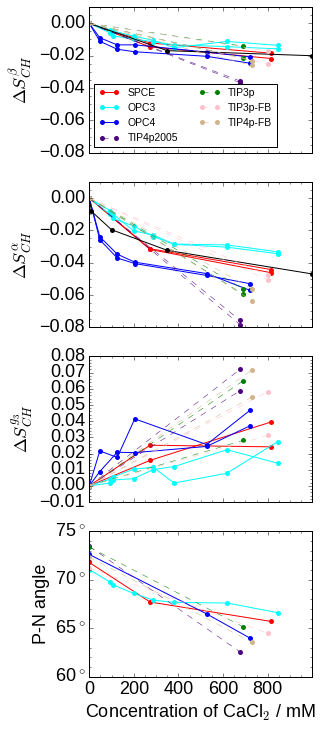

In [10]:
font = {'family' : 'Liberation Sans',
        'style'  : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

fig, axs = plt.subplots(nrows=4, ncols=1, sharex="all", figsize=[4,12], dpi=200)
#fig.subplotpars.left = 0.3

# give subplots human-redable names
dsa = axs[1] # Delta S alpha
dsb = axs[0] # Delta S beta
dsg = axs[2] # Delta S g_3
pna = axs[3] # PN_vector

# add some text for labels, title and axes ticks
pna.set_xlabel(r'Concentration of CaCl$_2$ / mM')
pna.set_ylabel(r'P-N angle')
dsa.set_ylabel(r'$\Delta S_{CH} ^{\alpha}$')
dsb.set_ylabel(r'$\Delta S_{CH} ^{\beta}$')
dsg.set_ylabel(r'$\Delta S_{CH} ^{g_3}$')

#pna.set_xlim([0.0,60.0])
#ax.set_xticks(r1)
#xlabelsl = list(xlabels)
#xlabelsl.extend(range(2, 18))
#ax.set_xticklabels(xlabelsl, rotation=0)


for watmod in opsdata_waters.keys():
    opsplot = opsdata_waters[watmod]
    for key in opsplot.keys():
        yerror = 0.001
        do_delta = False
        if key.startswith("alpha"):
            iplt = 1
            do_delta = True
            ylim = [-0.08, 0.01]
        elif key.startswith("beta"):
            iplt = 0
            do_delta = True
            ylim = [-0.08, 0.01]
        elif key.startswith("g3"):
            iplt = 2
            do_delta = True
            ylim = [-0.01, 0.08]
        elif key.startswith("PN"):
            iplt = 3
            yerror = 0.15
            ylim = [60.0, 75.0]
        else:
            print "this should not happen, setting iplt = 2"
            iplt = 2
        ax = axs[iplt]
        ax.set_ylim(ylim)
        if isinstance(opsplot[key], list):
            opsplot[key].sort()
        else:
            #print "this is not list, not sorting. It's likely the experimental data."
            pass
        data = np.array(opsplot[key])
        if do_delta:
            data[:,1] -= data[0,1]
        #ax.errorbar(data[:,0], data[:,1], yerr=yerror, lw=2.0, marker='s', markersize=5, mew=0, color=c) #, c=colour, lw=1.0, label=point_label)
        if key.startswith("beta1"):
            plot_label = watmod
        else:
            plot_label = None
        if key.startswith('alpha'):
            #print watmod, "\n", data, "\n"
            pass
        
        linewidth = 0.5
        linestyle = '--'
        if watmod.startswith('OPC') or watmod.startswith('exp')  or watmod.startswith('SPCE'):
            linewidth = 1.0
            linestyle = '-'
            
        if not data.shape == (0,):
            ax.plot(data[:,0], data[:,1], c=colour_code[watmod],ls=linestyle, lw=linewidth, marker='o', markersize=5, mew=0, label=plot_label) #, c=colour, lw=1.0, label=point_label)

        
for ax in axs:
    ax.minorticks_on()
    pass
    
xlim = pna.get_xlim()
num_range = range(int(xlim[0]), int(xlim[1]), 200)
pna.set_xticks(num_range)
pna.set_xticklabels([ str(i) for i in num_range])
pna.set_xlim(xlim)

ylim = pna.get_ylim()
pna.set_yticks(range(0,90,5))
pna.set_yticklabels([ str(i)+r"$^\circ$" for i in range(0,90,5)])
pna.set_ylim(ylim)

dsb.legend(loc='lower left', ncol=2, markerscale=1.0, scatterpoints=4, fontsize='xx-small')

plt.savefig("PN_angle_OrdPars-A-B-g3_L14-ECCL17_q80_sig89_CaCl_waterModels.pdf", dpi=200, bbox_inches='tight')
plt.show()
